#**პრაქტიკული დავალება #3**
## **ვადა (deadline): 4 ივნისი 9:00AM**

- თითოეული სავარჯიშო ფასდება შესაბამისი ქულით, რაც ჯამში შეადგენს **7 ქულას**

## **მონაცემები**

- მოცემულია ფაილი Global_Superstore.csv, რომელიც მოიცავს მონაცემებს შეკვეთების, პროდუქტების, გაყიდვების, მომგებიანობის, მომხმარებლებისა და გეოგრაფიული რეგიონების შესახებ.

In [2]:
import pandas as pd

superstore_df = pd.read_csv('Global_Superstore.csv', encoding='ISO-8859-1')

superstore_df.head()

,ï»¿Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


## **სავარჯიშო 1:** გაყიდვების და მოგების დინამიკა (**0.5 ქულა**)
- ააგეთ ხაზოვანი გრაფიკი Matplotlib-ის გამოყენებით, რომელიც აჩვენებს გაყიდვებისა და მოგების დინამიკას შეკვეთის თარიღის მიხედვით. მოგებისთვის გამოიყენეთ მეორადი y-ღერძი.

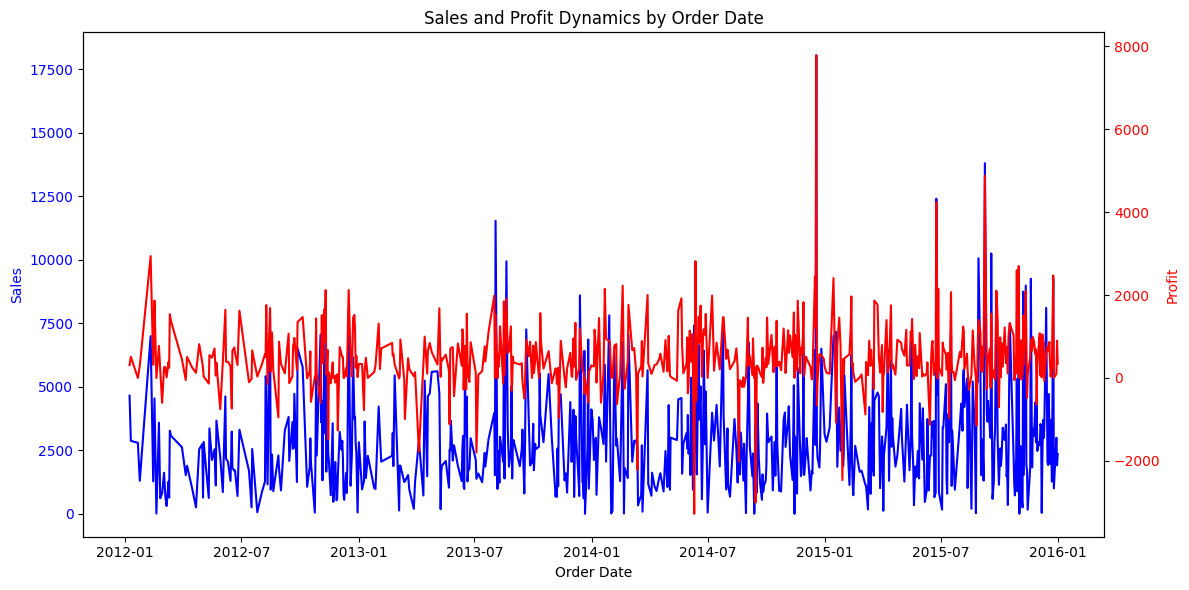

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

superstore_df = pd.read_csv('Global_Superstore.csv', encoding='ISO-8859-1')

superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'])

sales_profit_df = superstore_df.groupby('Order Date').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(sales_profit_df['Order Date'], sales_profit_df['Sales'], color='b', label='Sales')
ax1.set_xlabel('Order Date')
ax1.set_ylabel('Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(sales_profit_df['Order Date'], sales_profit_df['Profit'], color='r', label='Profit')
ax2.set_ylabel('Profit', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Sales and Profit Dynamics by Order Date')
fig.tight_layout()

plt.show()


## **სავარჯიშო 2:** მოგების და ფასდაკლების გაფანტულობის დიაგრამა (**0.5 ქულა**)
- Altair-ის მეშვეობით ააგეთ გაფანტულობის დიაგრამა, რომელიც აჩვენებს კავშირს მოგებასა და ფასდაკლებას შორის და გააფერადეთ კატეგორიის მიხედვით


In [4]:
import altair as alt
import pandas as pd

scatter_data = superstore_df[['Profit', 'Discount', 'Category']]

chart = alt.Chart(scatter_data).mark_point().encode(
    x=alt.X('Profit', title='Profit'),
    y=alt.Y('Discount', title='Discount'),
    color=alt.Color('Category', scale=alt.Scale(scheme='viridis'), title='Category')
).properties(
    title='Profit vs. Discount by Category',
    width=600,
    height=400
)

chart


alt.Chart(...)

## **სავარჯიშო 3**: მოგების განაწილების ვიზუალიზება კატეგორიებში (**1 ქულა**)
- Altair-ის გამოყენებით ქედის (ridgeline) დიაგრამით აჩვენეთ მოგების განაწილება თითოეულ კატეგორიაში



In [11]:
import altair as alt
import pandas as pd

superstore_df = pd.read_csv('Global_Superstore.csv', encoding='ISO-8859-1')

ridgeline_data = superstore_df[['Profit', 'Category']]

chart = alt.Chart(ridgeline_data).transform_density(
    density='Profit',
    groupby=['Category'],
    as_=['Profit', 'density']
).mark_area(opacity=0.7).encode(
    x=alt.X('Profit:Q', title='Profit'),
    y=alt.Y('density:Q', stack=None, title='Density'),
    color=alt.Color('Category:N', scale=alt.Scale(scheme='tolrainbow'), title='Category')
).properties(
    title='Distribution of Profit by Category',
    width=600,
    height=100
).facet(
    row='Category:N'
).configure_facet(
    spacing=0
)

chart



alt.FacetChart(...)

## **სავარჯიშო 4**: მოგების განაწილების ვიზუალიზება სეგმენტებსა და კატეგორიებში (**1 ქულა**)
- Plotly-ს გამოყენებით გამოსახეთ მოგების განაწილება სეგმენტებსა და კატეგორიებში ვიოლინოს დიაგრამის და ბოქსპლოტის საშუალებით





In [8]:
import pandas as pd
import plotly.graph_objects as go

superstore_df = pd.read_csv('Global_Superstore.csv', encoding='ISO-8859-1')

data_by_segment_category = superstore_df.groupby(['Segment', 'Category'])['Profit'].describe()

violin_trace = []
for (segment, category), stats in data_by_segment_category.iterrows():
    violin_trace.append(
        go.Violin(
            x=[f"{segment} - {category}"] * len(superstore_df[(superstore_df['Segment'] == segment) & (superstore_df['Category'] == category)]),
            y=superstore_df[(superstore_df['Segment'] == segment) & (superstore_df['Category'] == category)]['Profit'],
            name=f"{segment} - {category}",
            box_visible=True,
            fillcolor='rgba(100, 180, 220, 0.2)',
            line_color='rgba(100, 180, 220, 1)',
            opacity=0.6
        )
    )

boxplot_trace = []
for (segment, category), stats in data_by_segment_category.iterrows():
    boxplot_trace.append(
        go.Box(
            x=[f"{segment} - {category}"] * len(superstore_df[(superstore_df['Segment'] == segment) & (superstore_df['Category'] == category)]),
            y=superstore_df[(superstore_df['Segment'] == segment) & (superstore_df['Category'] == category)]['Profit'],
            name=f"{segment} - {category}",
            boxmean='sd',
            fillcolor='rgba(200, 200, 200, 0.3)',
            line_color='black'
        )
    )

layout = go.Layout(
    title='Profit Distribution by Segment and Category',
    xaxis_title='Segment - Category',
    yaxis_title='Profit',
    violinmode='overlay'
)

fig = go.Figure(data=violin_trace + boxplot_trace, layout=layout)
fig.show()


## **სავარჯიშო 5:** სეგმენტების საშუალო მომგებიანობა რეგიონებში (**1 ქულა**)

- ლოლიპოპის დიაგრამის გამოყენებით გამოსახეთ სეგმენტების საშუალო მომგებიანობა რეგიონების მიხედვით



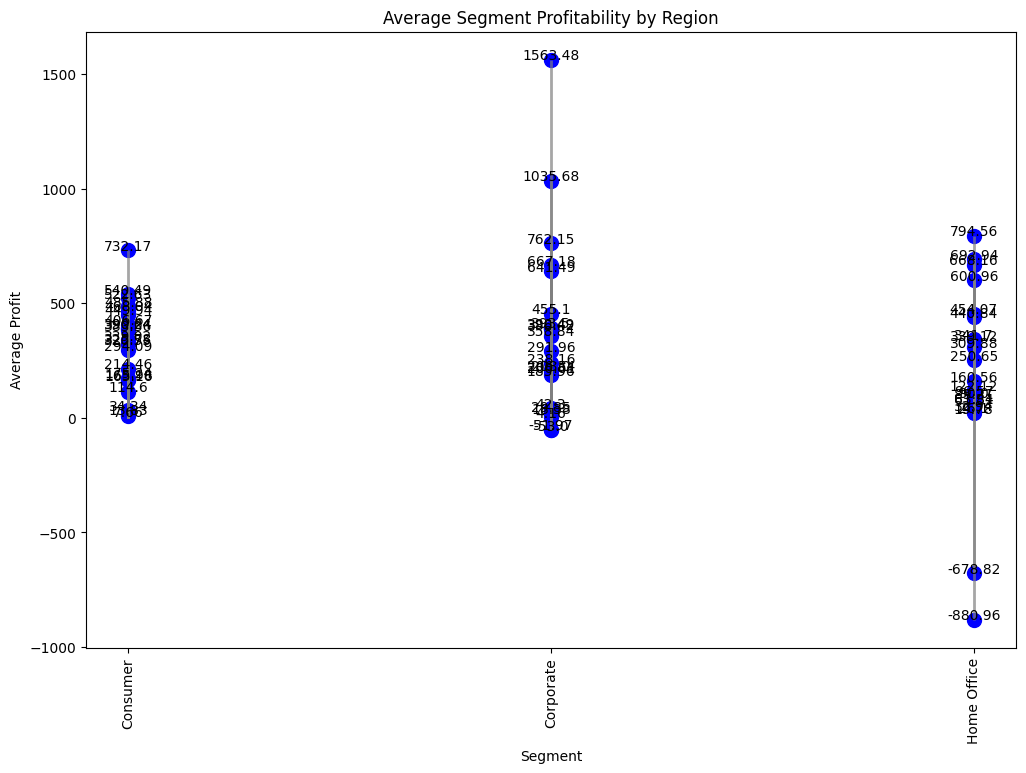

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

superstore_df = pd.read_csv('Global_Superstore.csv', encoding='ISO-8859-1')

avg_profit_by_region_segment = superstore_df.groupby(['Region', 'Segment'])['Profit'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))

for region in avg_profit_by_region_segment['Region'].unique():
    region_data = avg_profit_by_region_segment[avg_profit_by_region_segment['Region'] == region]
    ax.vlines(x=region_data['Segment'], ymin=0, ymax=region_data['Profit'], color='gray', alpha=0.7, linewidth=2)

ax.scatter(avg_profit_by_region_segment['Segment'], avg_profit_by_region_segment['Profit'], color='b', s=100)

for i in range(len(avg_profit_by_region_segment)):
    ax.text(avg_profit_by_region_segment['Segment'][i], avg_profit_by_region_segment['Profit'][i] + 0.05, round(avg_profit_by_region_segment['Profit'][i], 2), horizontalalignment='center')

plt.xticks(rotation=90)
ax.set_xlabel('Segment')
ax.set_ylabel('Average Profit')
ax.set_title('Average Segment Profitability by Region')

plt.show()


## **სავარჯიშო 6:** ვენის დიაგრამა (Venn diagram) (**1.5 ქულა**)

- superstore_df ცხრილს დაამატეთ 4 სვეტი:
  - ტექნოლოგია: 1, როცა კატეგორია უდრის ტექნოლოგიას, 0 სხვაგვარად
  - მომგებიანობა: 1, როცა მოგება > 0, 0 სხვაგვარად
  - ფასდაკლება: 1, როცა ფასდაკლება > 0, 0 სხვაგვარად
  - მაღალი_პრიორიტეტი: 1, როცა შეკვეთის პრიორიტეტულობა მაღალი ან კრიტიკულია, 0 სხვაგვარად
- matplotlib-ისა და matplotlib_venn-ის გამოყენებით ააგეთ 3 წრიანი ვენის დიაგრამები:
  - რომელიც გამოსახავს ტექნოლოგიის, მომგებიანობის და ფასდაკლების თანაკვეთას
  - რომელიც აჩვენებს ტექნოლოგიის, მომგებიანობის და მაღალი_პრიორიტეტის თანაკვეთას



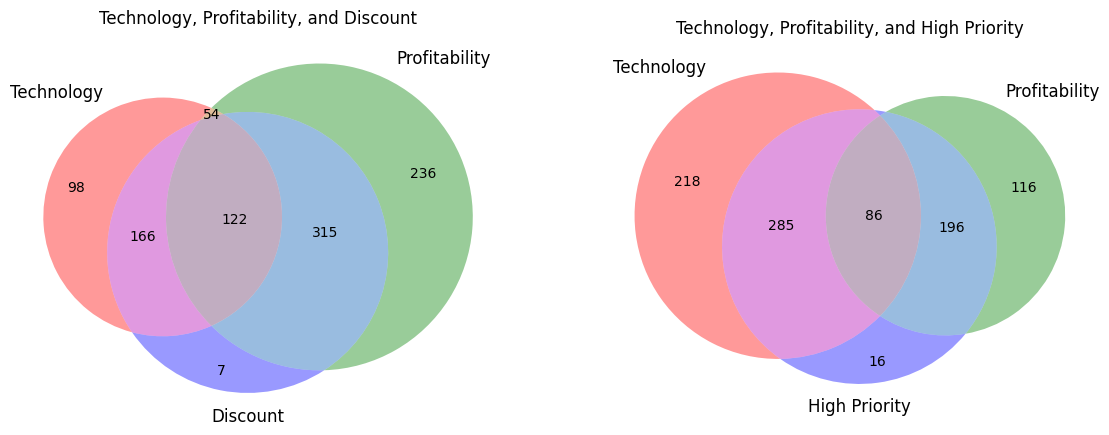

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

superstore_df = pd.read_csv('Global_Superstore.csv', encoding='ISO-8859-1')

superstore_df['Technology'] = (superstore_df['Category'] == 'Technology').astype(int)
superstore_df['Profitability'] = (superstore_df['Profit'] > 0).astype(int)
superstore_df['Discount'] = (superstore_df['Discount'] > 0).astype(int)
superstore_df['High_Priority'] = superstore_df['Order Priority'].isin(['High', 'Critical']).astype(int)

def calculate_subsets(df, col1, col2, col3):
    return (
        len(df[(df[col1] == 1) & (df[col2] == 1) & (df[col3] == 1)]),
        len(df[(df[col1] == 1) & (df[col2] == 1) & (df[col3] == 0)]),
        len(df[(df[col1] == 1) & (df[col2] == 0) & (df[col3] == 1)]),
        len(df[(df[col1] == 1) & (df[col2] == 0) & (df[col3] == 0)]),
        len(df[(df[col1] == 0) & (df[col2] == 1) & (df[col3] == 1)]),
        len(df[(df[col1] == 0) & (df[col2] == 1) & (df[col3] == 0)]),
        len(df[(df[col1] == 0) & (df[col2] == 0) & (df[col3] == 1)])
    )

subsets_tech_prof_disc = calculate_subsets(superstore_df, 'Technology', 'Profitability', 'Discount')
subsets_tech_prof_high = calculate_subsets(superstore_df, 'Technology', 'Profitability', 'High_Priority')

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

venn3(subsets=subsets_tech_prof_disc, set_labels=('Technology', 'Profitability', 'Discount'), ax=axs[0])
axs[0].set_title('Technology, Profitability, and Discount')

venn3(subsets=subsets_tech_prof_high, set_labels=('Technology', 'Profitability', 'High Priority'), ax=axs[1])
axs[1].set_title('Technology, Profitability, and High Priority')

plt.show()


## **სავარჯიშო 7:** აფსეტური დიაგრამა (upset plot) (**1.5 ქულა**)

- upsetplot-ის მეშვეობით აფსეტური დიაგრამით გამოსახეთ ტექნოლოგიის, მომგებიანობის, ფასდაკლებისა და მაღალი_პრიორიტეტის თანაკვეთა



In [13]:
# დააყენეთ upsetplot
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24817 sha256=57ca1995cb62ed2905a4a2deac5f2e215726b4e6810e70094a9d2fd098e53b55
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


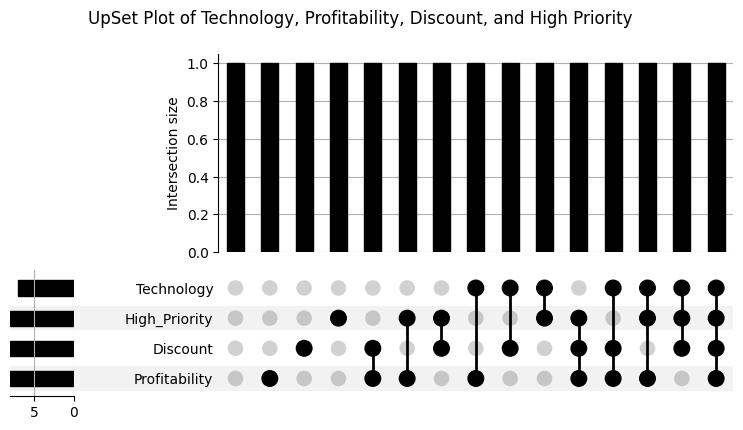

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet

superstore_df = pd.read_csv('Global_Superstore.csv', encoding='ISO-8859-1')

superstore_df['Technology'] = (superstore_df['Category'] == 'Technology').astype(int)
superstore_df['Profitability'] = (superstore_df['Profit'] > 0).astype(int)
superstore_df['Discount'] = (superstore_df['Discount'] > 0).astype(int)
superstore_df['High_Priority'] = superstore_df['Order Priority'].isin(['High', 'Critical']).astype(int)

attributes = ['Technology', 'Profitability', 'Discount', 'High_Priority']
superstore_df['Combination'] = superstore_df[attributes].apply(lambda row: tuple(row), axis=1)
combination_counts = superstore_df['Combination'].value_counts()

combination_df = combination_counts.reset_index()
combination_df.columns = ['Combination', 'Count']

for i, attr in enumerate(attributes):
    combination_df[attr] = combination_df['Combination'].apply(lambda x: x[i])

upset_data = combination_df.set_index(attributes)['Count']
upset_plot = UpSet(upset_data, subset_size='count')
upset_plot.plot()

plt.suptitle('UpSet Plot of Technology, Profitability, Discount, and High Priority')
plt.show()
